In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  datetime import datetime
import os
import nltk
from textblob import TextBlob
import networkx as nx
%matplotlib inline

from IPython.display import display  
from ipywidgets import FloatProgress  
import time

import pprint as pp

In [2]:
_dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
# email_sen_df = pd.read_pickle(_dataset2_dir+"email_sen_df")
emp_df = pd.read_pickle('emp_info_last_access')

In [17]:
sentiments=pd.DataFrame(pd.read_pickle("email_sentiment_analysis_df_vader"))
sentiments.rename(columns={'content' : 'sentiment'}, inplace=True)

In [2]:
email_sentiment_df = pd.merge(email_sen_df, sentiments, how='inner', left_index=True, right_index=True)

NameError: name 'email_sen_df' is not defined

In [6]:
emp_df[emp_df['role']=='ITAdmin']

,user_id,email,role,business_unit,functional_unit,department,team,supervisor,empl_duration_months,left,O,C,E,A,N,Num_Logons,Num_Logoffs,last_logon_date,last_empl_month,#_access_after_leaving
employee_name,,,,,,,,,,,,,,,,,,,,
Jacqueline Latifah Miles,JLM0364,Jacqueline.Latifah.Miles@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,16,1,35,22,15,25,37,1314,1314,2011-04-29 22:45:15,2011-03-01,1
Howard Wing Yang,HWY0038,Howard.Wing.Yang@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSecurity,Frances Alisa Wiggins,6,1,47,39,40,22,24,449,449,2010-06-04 23:17:23,2010-05-01,1
Kennedy Shad Parker,KSP0357,Kennedy.Shad.Parker@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,12,1,41,40,29,19,24,945,945,2010-12-08 20:42:02,2010-11-01,1
Wesley Dustin Dickerson,WDD0366,Wesley.Dustin.Dickerson@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,15,1,43,42,17,19,28,1450,1219,2011-03-22 16:24:00,2011-02-01,1
Bevis Brady Sheppard,BBS0039,Bevis.Brady.Sheppard@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSecurity,Frances Alisa Wiggins,8,1,44,37,34,21,40,663,663,2010-08-13 21:30:41,2010-07-01,1
Emerald Imani Schmidt,EIS0041,Emerald.Imani.Schmidt@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,2 - ElectronicSecurity,Frances Alisa Wiggins,18,0,41,44,17,48,30,1661,1391,2011-05-16 22:28:35,2011-05-01,0
Sean Omar Burgess,SOB0360,Sean.Omar.Burgess@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,11,1,42,22,40,16,32,890,890,2010-11-19 23:01:58,2010-10-01,1
Arthur John Floyd,AJF0370,Arthur.John.Floyd@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,18,0,37,33,11,15,36,1777,1490,2011-05-16 20:46:36,2011-05-01,0
Logan Branden Cherry,LBC0356,Logan.Branden.Cherry@dtaa.com,ITAdmin,1,1 - Adminstration,6 - Security,3 - ElectronicSecurity,Francis Brian Armstrong,18,0,40,30,40,21,41,1662,1391,2011-05-16 16:10:00,2011-05-01,0


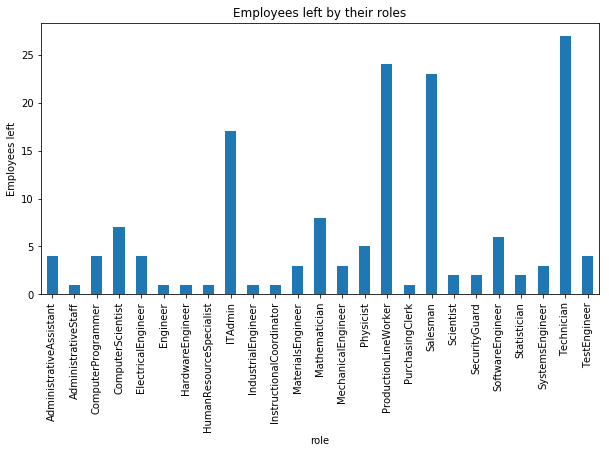

In [11]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_xlabel("Role")
ax.set_ylabel("Employees left")
ax.set_title("Employees left by their roles")
emp_df[emp_df['left']==1].groupby('role').size().plot(kind='bar')

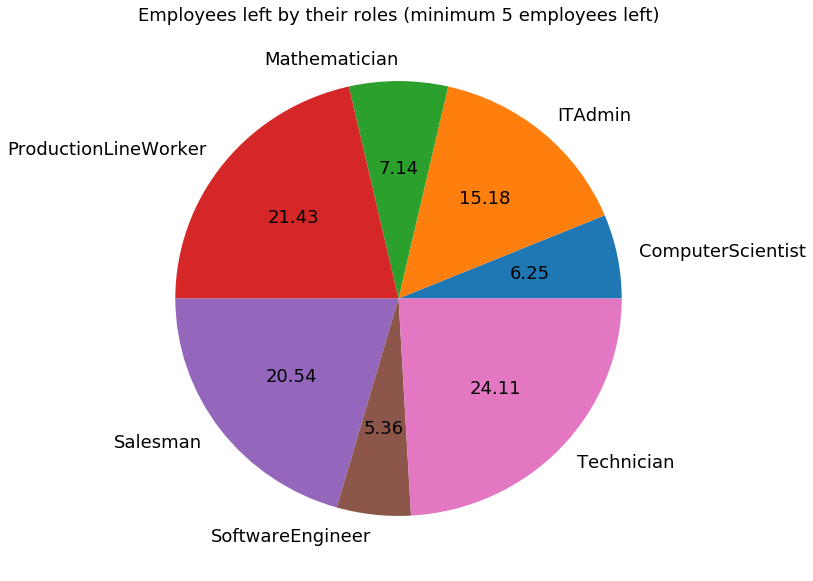

In [7]:
plt.figure(figsize=(10,10))
_df = pd.DataFrame(emp_df[emp_df['left']==1].groupby('role').size())
n=_df[_df[0]>5][0]
n.rename("").plot(y=0, kind='pie', autopct='%.2f', legend=False, fontsize=18)
plt.title("Employees left by their roles (minimum 5 employees left)", fontsize=18)
plt.savefig("employees_left_by_roles.png")

In [55]:
_df[0]

role
AdministrativeAssistant      4
AdministrativeStaff          1
ComputerProgrammer           4
ComputerScientist            7
ElectricalEngineer           4
Engineer                     1
HardwareEngineer             1
HumanResourceSpecialist      1
ITAdmin                     17
IndustrialEngineer           1
InstructionalCoordinator     1
MaterialsEngineer            3
Mathematician                8
MechanicalEngineer           3
Physicist                    5
ProductionLineWorker        24
PurchasingClerk              1
Salesman                    23
Scientist                    2
SecurityGuard                2
SoftwareEngineer             6
Statistician                 2
SystemsEngineer              3
Technician                  27
TestEngineer                 4
Name: 0, dtype: int64

In [98]:
left_salesmen = email_sen_df[email_sen_df['user'].isin(emp_df[(emp_df['role']=='Salesman') & (emp_df['left']==1)]['user_id'])]

In [130]:
pd.set_option('display.max_colwidth', 500)
left_salesmen[left_salesmen['content'].str.contains('')]['content']
# pd.set_option('display.max_colwidth', 20)

Series([], Name: content, dtype: object)

## Left Production Line Workers

In [111]:
left_prod_line_worker = email_sen_df[email_sen_df['user'].isin(emp_df[(emp_df['role']=='ProductionLineWorker') \
                                                                      & (emp_df['left']==1)]['user_id'])]

In [ ]:
pd.set_option('display.max_colwidth', 500)
left_prod_line_worker[left_prod_line_worker['content'].str.contains('bastard')]['content']

## Left Technicians

In [112]:
left_technician = email_sen_df[email_sen_df['user'].isin(emp_df[(emp_df['role']=='Technician') \
                                                                      & (emp_df['left']==1)]['user_id'])]

In [124]:
pd.set_option('display.max_colwidth', 500)
left_technician[left_technician['content'].str.contains('threat')]['content']

id
{G1X4-P1UN76WY-8792GFYN}                          wet besides chills shots climatological cover place appear cost several mph plateau risk carnival found area world transition blocks one 1975 2001 saskatchewan bright america characteristics 11th descend forest remnants september besides dust finland some despite precipitation threat frostbite characterized york russian dfa hall bringing winters lack port service rather 1988 like 11 echos theater associated reached park confine late colorful jams thus evolve rain northward
{N8H2-T0QG25MB-9045WWBM}                                                                                                                                                                                        roman operation defended until died interview 38 davouts tempted austro now threats saw determining at unit clear if apparently axis evicted detachments attended 100 historians russo celebrated north refuge going title link structures visit that foes franco 15 

## Left ITAdmins

In [116]:
left_itadmin = email_sen_df[email_sen_df['user'].isin(emp_df[(emp_df['role']=='ITAdmin') \
                                                                      & (emp_df['left']==1)]['user_id'])]

In [128]:
pd.set_option('display.max_colwidth', 500)
left_itadmin[left_itadmin['content'].str.contains('bastard')]['content']

id
{U3F4-R7KF94EL-1631XPID}                                                                                              project news reassign project now what meeting funding project news meeting news i heard reassign funding did you read email news announcement did you read email down size how can this happen project did you read email news did you read email cancelled project how can this happen i heard funding down size cancelled i heard did you read email project project now what those bastards down size meeting meeting
{U1B9-S8TL19YR-8779VLTF}                                        reassign cancelled meeting reassign funding announcement news funding news meeting did you read email how can this happen funding meeting i heard funding down size did you read email announcement cancelled news cancelled cancelled reassign news those bastards down size cancelled i heard how can this happen now what down size cancelled project reassign news now what tomorrow i heard news reassign news d

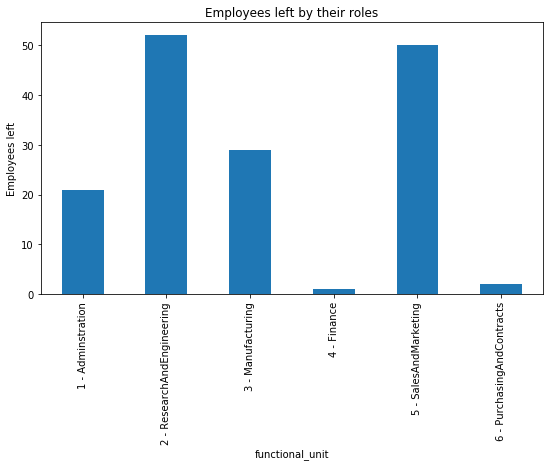

In [31]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
ax.set_xlabel("Role")
ax.set_ylabel("Employees left")
ax.set_title("Employees left by their roles")
emp_df[emp_df['left']==1].groupby('functional_unit').size().plot(kind='bar')

In [50]:
# email_sentiment_df['user'].isin(emp_df[emp_df['#_access_after_leaving']>0]['user_id'].tolist())
emp_df[emp_df['#_access_after_leaving']>0][['user_id','last_logon_date']]

,user_id,last_logon_date
employee_name,,
Cecilia Yuri Ashley,CYA0506,2010-06-01 17:09:00
Evelyn Sarah Reilly,ESR0693,2010-08-31 18:52:00
Raya Regan Church,RRC0553,2010-04-01 18:11:00


In [46]:
email_sentiment_df[email_sentiment_df['user']=='CYA0506'].sort_values(by='date')

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity,sentiment
id,,,,,,,,,,,,,
{L2R1-C6NE68UI-3999KHKK},01/04/2010 09:20:49,CYA0506,PC-6538,Athena.Amelia.Foreman@dtaa.com;Ferdinand.Rasha...,NaN,NaN,Cecilia.Yuri.Ashley@dtaa.com,26049,0,traced 445 assigned for seven that restrengthe...,-0.002525,0.465657,-0.1779
{K5E8-B8GD69ME-6445QYFK},01/04/2010 09:29:06,CYA0506,PC-6538,Alma.Leila.Duncan@dtaa.com,NaN,NaN,Cecilia.Yuri.Ashley@dtaa.com,34303,0,end including then running best with persuaded...,0.366667,0.323611,0.9022
{G5S1-U2TN58KG-3197UZNP},01/04/2010 09:29:08,CYA0506,PC-6538,Mallory.Virginia.Bender@dtaa.com,NaN,NaN,Cecilia.Yuri.Ashley@dtaa.com,26871,0,get 15 smith 10 children george voted phillip ...,0.340000,0.373333,0.8271
{M4B6-A2XV81NW-1235HTAX},01/05/2010 10:35:26,CYA0506,PC-6538,Paula.Isabelle.Santiago@dtaa.com,Flynn.Malcolm.Gibson@dtaa.com,NaN,Cecilia.Yuri.Ashley@dtaa.com,31032,0,story passed merely stating seen perhaps resou...,0.096667,0.556667,0.7506
{D0Y6-R4FP33LN-1665QYDT},01/05/2010 11:32:18,CYA0506,PC-6538,Ella.Rachel.Hess@dtaa.com;Ulric.Colt.Holt@dtaa...,NaN,NaN,Cecilia.Yuri.Ashley@dtaa.com,31579,0,delicate every coral portugal equipped capable...,-0.074603,0.512698,0.1531
{O2B6-C8IV11IB-0678LBLT},01/05/2010 12:44:56,CYA0506,PC-6538,Burke.Randall.Burnett@dtaa.com,NaN,NaN,Cecilia.Yuri.Ashley@dtaa.com,56219,0,international edward written quarter outside b...,0.025000,0.341667,0.2911
{S1O9-R7PR10IR-1727EBOO},01/06/2010 15:19:58,CYA0506,PC-6538,Farmer-Yoshio@juno.com,NaN,NaN,Cecilia.Y.Ashley@charter.net,20919,0,one tom willing 2003 internationally opening m...,0.133333,0.519048,0.8284
{S1T9-W3BK50CD-3239PGFN},01/06/2010 15:40:59,CYA0506,PC-6538,OBH7@charter.net;Cleo.J.Morales@yahoo.com;Kate...,TaShya.Chandler@optonline.net,NaN,Cecilia.Y.Ashley@charter.net,34051,0,royale older around life versus meant do prote...,0.219444,0.397222,0.5627
{D9F3-I3KZ50NI-1229AOWL},01/06/2010 15:41:22,CYA0506,PC-6538,Lavinia.J.Richmond@msn.com,Buffy.V.Nichols@verizon.net,NaN,Cecilia.Y.Ashley@charter.net,33275,0,38 jordan retain versus was that 11 23 34 last...,0.095238,0.200794,0.3818


In [51]:
email_sentiment_df[email_sentiment_df['user']=='RRC0553'].sort_values(by='date')

,date,user,pc,to,cc,bcc,from,size,attachments,content,polarity,subjectivity,sentiment
id,,,,,,,,,,,,,
{K7F2-G8TP65TA-8580MKWD},01/02/2010 09:52:40,RRC0553,PC-6672,Ayanna.Leandra.Dunlap@dtaa.com;Britanni.Marah....,Philip.Travis.Hartman@dtaa.com;Veda.Martina.Ja...,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,42488,1,could soviet ever 112 costs 70 country mid sca...,0.141880,0.476068,0.8032
{G2B8-C7ED16EY-6928VXEY},01/02/2010 11:13:30,RRC0553,PC-6672,Britanni.Marah.Cash@dtaa.com,NaN,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,29030,2,speech those saying newly ban separate accused...,0.114394,0.300758,-0.9578
{G7U8-H9VI34JZ-2663UCJX},01/02/2010 11:14:20,RRC0553,PC-6672,Wade.Ira.Frazier@dtaa.com,Philip.Travis.Hartman@dtaa.com,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,27107,0,rigby indirect secured tall island carried to ...,0.125000,0.400000,0.4588
{I9Q0-I9SF85NZ-9263EXAQ},01/02/2010 11:24:41,RRC0553,PC-6672,Veda.Martina.Jacobson@dtaa.com;Ayanna.Leandra....,NaN,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,24172,0,ft pieces dramatized southern destroyers both ...,0.173333,0.498333,-0.7030
{N3K0-D1DM27KV-3284YICP},01/02/2010 11:51:43,RRC0553,PC-6672,Jermaine.Mannix.Hansen@dtaa.com,Raya.Regan.Church@dtaa.com,NaN,Raya.Regan.Church@dtaa.com,27663,0,according used added circular oliver john 1379...,0.112434,0.354762,-0.6486
{Z4K8-J9LU62ER-2594UQFL},01/02/2010 11:59:21,RRC0553,PC-6672,Chandler.Raymond.Kirk@dtaa.com,Raya.Regan.Church@dtaa.com,NaN,Raya.Regan.Church@dtaa.com,27758,0,holes damaged escaped second two august made h...,0.179167,0.345833,0.0964
{U7O9-M7HT11ME-9812TTZR},01/02/2010 12:48:40,RRC0553,PC-6672,Honorato.Ivan.Wall@dtaa.com;Keely.Mollie.Weiss...,NaN,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,39382,0,ornamental discovered trees aquitaine accommod...,0.150000,0.250000,0.4939
{O3D8-U5YE63AI-1008HCNW},01/02/2010 12:49:13,RRC0553,PC-6672,Veda.Martina.Jacobson@dtaa.com,Raya.Regan.Church@dtaa.com,NaN,Raya.Regan.Church@dtaa.com,33162,0,those were nearby courts these historian extin...,-0.164286,0.735714,0.1551
{U6J5-Z0LA39YG-9571WACZ},01/02/2010 17:06:04,RRC0553,PC-6672,Veda.Martina.Jacobson@dtaa.com;Tara.Alma.Potts...,NaN,Raya.Regan.Church@dtaa.com,Raya.Regan.Church@dtaa.com,26884,0,telephone recalled gunner aid west skin mid op...,-0.020000,0.240000,0.8696


In [74]:
employees_left = emp_df[emp_df['left']==1][['user_id','last_empl_month','role', 'supervisor', 'team', 'department', 'O', 'C', 'E', 'A', 'N']]
employees_left_emails = pd.merge(employees_left, email_sen_df, how="left", left_on='user_id', right_on='user')

In [75]:
technicians_left_emails = employees_left_emails[employees_left_emails['role'] == 'Technician']

In [76]:
salesmen_left_emails = employees_left_emails[employees_left_emails['role'] == 'Salesman']

In [87]:
itadmin_left_emails = employees_left_emails[employees_left_emails['role'] == 'ITAdmin']

In [88]:
doc_set=itadmin_left_emails['content'].tolist()


import pandas
import os
import numpy as np

from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models, similarities
from gensim.models import CoherenceModel, Phrases
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS
import time

import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim') # to suppress warnings on windows.
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim.models')



# # Read data
# _dataset2_dir = "C:\\Users\\talha\\Documents\\DA\\da_project\\dataset2\\"
# # _dataset2_dir = "/groups/DataLightHouse/1004/DataSets2_10012017/"
# email_file = _dataset2_dir + "email_info.csv"
# data_email = pandas.read_csv(_dataset2_dir+"email_file")
# doc_set = data_email["content"][:1000].tolist()


# Stop Words.
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(get_stop_words('en'))
spacy_stop = set(STOP_WORDS)
nltk_stop = set(stopwords.words('english'))
my_stop_words = set(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'first', 'second', 'third',
                'many', 'however', 'since', 'either', 'although', 'much', 'also', 'another', 'became', 'become', 'usually', 
                    'also', 'c', 'along', 'made', 'still', 'known', 'took', 'less', 'around', 'though', 'part', 'gave',
                    'later', 'early', 'went', 'long', 'began', 'mid', 'set', 'late', 'wrote', 'given', 'day', 'away',
                    'able', 'way', 'met', 'come', 'etc', 'able', 'said', 'based', 'kept', 'left', 'came', 'led', 'old', 
                    'new', 'apart', 'named', 'agrees', 'received', 'left', 'found', 'begun', 'late', 'early',
                    'half', 'new', 'old', 'instead', 'despite', 'overall', 'b', 'including', 'f', 'eyes',
                     
                     'east', 'west', 'north', 'south', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 
                     'august', 'september', 'october', 'november', 'december', 'according', 
                     
                     'near', 'initial', 'ultimately', 'better'])

stop_words = en_stop.union(my_stop_words).union(nltk_stop).union(spacy_stop)

print(len(stop_words))



# Topic analysis using LDA.
def topic_analysis(data, num_topics, iterations=200):
    """
    @param data list of all the documents
    @param num_topics number of topics to find from topic modeling
    """
    texts = [None] * len(doc_set)
    # loop through document list
    for ind, i in enumerate(doc_set):
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if i not in stop_words and not i.isdigit()]
        # add tokens to list
        #texts.append(stopped_tokens)
        texts[ind]=stopped_tokens
    
    bigram = Phrases(texts)
    texts = [bigram[line] for line in texts]
        
    # remove words that appear only once
    all_tokens = sum(texts, [])
    tokens_once = set(word for word in set(all_tokens) if all_tokens.count(word) == 1)
    texts = [[word for word in text if word not in tokens_once] for text in texts]

    # turn our tokenized documents into a id <-> term dictionary
    dictionary = corpora.Dictionary(texts)
    # convert tokenized documents into a document-term matrix
    corpus = [dictionary.doc2bow(text) for text in texts]
    ldamodel = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, 
                                        iterations=iterations, minimum_probability=0, passes=20) # , passes=20,  chunksize=10000
    return (ldamodel, dictionary, corpus, texts)



# Doing Topic Analysis here.
start_time = time.time()
print ("Start At: " + time.strftime("%H:%M:%S", time.gmtime(start_time)))

topic_range = np.arange(10, 11)
coherences = np.zeros(topic_range.shape)
ldamodels = np.empty(topic_range.shape, dtype=object)
iterations=100

_ldamodel=None
corpus=None
dictionary=None
texts=None
min_lda_coherence = 0

for i, _num_topic in enumerate(topic_range):
    (ldamodel, dictionary, corpus, texts) = topic_analysis(doc_set, _num_topic, iterations=iterations)
    print ("LDA Model complete... " + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    ldatopics = ldamodel.show_topics(formatted=False)
    ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]
    print ("Got ldatopics. Creating coherence model.. "  + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    cm = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary) # , window_size=10
    lda_coherence = cm.get_coherence()
    print ("Got topic coherence... "   + time.strftime("%H:%M:%S", time.gmtime(time.time() - start_time)))
    if lda_coherence > min_lda_coherence:
        corpus = corpus
        dictionary = dictionary
        texts = texts
        _ldamodel = ldamodel
        min_lda_coherence = lda_coherence
    ldamodels[i] = ldamodel # save LDA model
    coherences[i] = lda_coherence # save coherence value
    print ("Iteration = " + str(i) + ", Num Topics = " + str(_num_topic) + ", Coherence = " + str(lda_coherence))
    
print (coherences)


print ("Displaying observed topics...")
print (ldamodels[np.argmax(coherences)].show_topics(formatted=False))



# Assign topics to emails:
num_topics=10
lda_corpus = [max(prob, key=lambda y:y[1])
                    for prob in _ldamodel[corpus] ]
emails_LDA = [[] for i in range(num_topics)]
for i, x in enumerate(lda_corpus):
    emails_LDA[x[0]].append(doc_set[i])

452
Start At: 07:10:28


C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getargspec(scoring)[0] for parameter in scoring_parameters):
C:\Users\talha\Anaconda3\lib\site-packages\gensim\models\phrases.py:275: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if all(parameter in getar

LDA Model complete... 00:33:29
Got ldatopics. Creating coherence model.. 00:33:29
Got topic coherence... 00:33:33
Iteration = 0, Num Topics = 10, Coherence = 0.436458615986
[ 0.43645862]
Displaying observed topics...
[(0, [('houtteman', 0.004044605825127055), ('speaking', 0.0035688316839649513), ('single', 0.0034807011474667134), ('central', 0.0034227240602146369), ('severe', 0.0034068858026958127), ('drove', 0.0033180466659885016), ('war', 0.003301837073250428), ('support', 0.0032401032530505513), ('southern', 0.0032395711143821623), ('handed', 0.0031650489206647165)]), (1, [('eventually', 0.0039565780670661839), ('level', 0.0037218428337232657), ('annual', 0.0036910230931611653), ('offered', 0.0036873926478819914), ('original', 0.003530264626531731), ('complete', 0.0034761548190706559), ('gray', 0.003475844009173985), ('expected', 0.0034703449444033699), ('place', 0.0034643750222229171), ('style', 0.0034592123248877865)]), (2, [('defeated', 0.003670634593525166), ('single', 0.0036057

In [89]:
ldatopics

[['houtteman',
  'speaking',
  'single',
  'central',
  'severe',
  'drove',
  'war',
  'support',
  'southern',
  'handed'],
 ['eventually',
  'level',
  'annual',
  'offered',
  'original',
  'complete',
  'gray',
  'expected',
  'place',
  'style'],
 ['defeated',
  'single',
  'control',
  'jim',
  'football',
  'drafted',
  'reduced',
  'similar',
  'prospect',
  'approach'],
 ['time',
  'years',
  'start',
  'people',
  'process',
  'convinced',
  'strong',
  'avoided',
  'hours',
  'team'],
 ['established',
  'end',
  'far',
  'night',
  'point',
  'taken',
  'face',
  'course',
  'accepted',
  'rapidly'],
 ['prince_prince',
  'followed',
  'involving',
  'placed',
  'citizen',
  'ride',
  'art',
  'guy',
  'selling',
  'virginia'],
 ['reporter',
  'hope',
  'sure',
  'quit',
  'drew',
  'offers',
  'kicking',
  'joseph',
  'zero',
  'losing'],
 ['coast',
  'executive',
  'big',
  'lady',
  '12th',
  'florida',
  'situation',
  'dozen',
  'world',
  'hot'],
 ['important',
  'fina

In [109]:
# import pyLDAvis.gensim
# warnings.filterwarnings(action='ignore', category=UserWarning, module='pyLDAvis') # to suppress warnings on windows.

# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(_ldamodel, corpus, dictionary)
# pyLDAvis.display(vis)